In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datetime
from datetime import date, timezone, timedelta
import pandas as pd
import numpy as np
import utils
import yfinance as yf
from spreads_prep import spreads_prep
from backtest import backtest
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time

In [4]:
tk = 'SPY'
op, st = utils.prep_op_st_df(_ticker = tk)
spread_prep = spreads_prep(op, st)

for d in [300]:
    options = spread_prep.df_aligned
#     calls.to_csv('Spreads_Data\\' + tk + '\\DTE'+ str(d)+ '_' + tk +'_calls_2010_2022.csv')
#     puts.to_csv('Spreads_Data\\' + tk + '\\DTE'+ str(d)+ '_' + tk +'_puts_2010_2022.csv')
    # For Mac, Use: 
#     calls.to_csv('Spreads_Data/' + tk + '/DTE'+ str(d)+ '_' + tk +'_calls_2010_2022.csv')
#     puts.to_csv('Spreads_Data/' + tk + '/DTE'+ str(d)+ '_' + tk +'_puts_2010_2022.csv')

C:\Users\27270\Option_Spreads_Backtesting\utils.py:68: DtypeWarning: Columns (9,10,11,12,13,16,18,19,21,22,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


[*********************100%***********************]  1 of 1 completed
Start date: 2010-01-01
End date: 2022-12-31
Done Cleaning Data! CPU time: 6.14 seconds, Total time: 14.00 seconds
Done Calculating Probability! CPU time: 3.23 seconds, Total time: 6.33 seconds


In [121]:
op

,QUOTE_TIME_EST,EXPIRE_EST,STRIKE,DTE,C_IV,C_BID,C_ASK,P_IV,P_BID,P_ASK
0,2010-01-04,2010-01-15,55.0,11.0,2.935300,58.200000,58.400000,1.367420,0.000000,0.020000
1,2010-01-04,2010-01-15,56.0,11.0,2.833570,57.200000,57.400000,1.334760,0.000000,0.010000
2,2010-01-04,2010-01-15,57.0,11.0,2.735830,56.200000,56.390000,1.306550,0.000000,0.010000
3,2010-01-04,2010-01-15,58.0,11.0,2.640920,55.190000,55.400000,1.272370,0.000000,0.030000
4,2010-01-04,2010-01-15,59.0,11.0,2.549920,54.200000,54.400000,1.244210,0.000000,0.020000
...,...,...,...,...,...,...,...,...,...,...
8496417,2022-12-30,2025-12-19,630.0,1085.0,0.177700,0.59,10.0,,243.0,250.5
8496418,2022-12-30,2025-12-19,635.0,1085.0,0.173040,2.0,7.0,0.295570,247.66,257.5
8496419,2022-12-30,2025-12-19,640.0,1085.0,0.175580,2.0,7.0,0.302890,253.0,262.5
8496420,2022-12-30,2025-12-19,645.0,1085.0,0.182390,0.12,10.0,0.306990,258.0,267.5


In [217]:
options_test = options.copy()
options_test['op_id'] = list(zip(options_test.EXPIRE_EST, options_test.STRIKE))

In [218]:
options_test = options_test.loc[options_test.QUOTE_TIME_EST >= datetime.date(year = 2018, month =1, day = 4)]

In [220]:
a = options_test.loc[options_test.QUOTE_TIME_EST == datetime.date(year = 2021, month =12, day = 31)]
a.sort_values(by = 'DTE', ascending = False)
a[a.DTE == 350].head()

,QUOTE_TIME_EST,EXPIRE_EST,STRIKE,DTE,C_IV,C_BID,C_ASK,P_IV,P_BID,P_ASK,PRICE@EXPIRE,CURRENT_PRICE,STRIKE_DISTANCE,P_ATM_IV,C_ATM_IV,P_ITM_PROB,C_ITM_PROB,P_OTM_PROB,C_OTM_PROB,op_id
6362930,2021-12-31,2022-12-16,85.0,350.0,2.34981,388.24,391.98,0.69776,0.24,0.26,383.269989,474.959991,389.959991,0.08376,0.0699,0.0,1.0,1.0,0.0,"(2022-12-16, 85.0)"
6362931,2021-12-31,2022-12-16,105.0,350.0,1.80818,368.31,371.99,0.65253,0.32,0.53,383.269989,474.959991,369.959991,0.08376,0.0699,0.0,1.0,1.0,0.0,"(2022-12-16, 105.0)"
6362932,2021-12-31,2022-12-16,135.0,350.0,1.29273,338.23,341.95,0.58223,0.67,0.70,383.269989,474.959991,339.959991,0.08376,0.0699,0.0,1.0,1.0,0.0,"(2022-12-16, 135.0)"
6362933,2021-12-31,2022-12-16,140.0,350.0,1.22954,333.25,337.00,0.57222,0.73,0.74,383.269989,474.959991,334.959991,0.08376,0.0699,0.0,1.0,1.0,0.0,"(2022-12-16, 140.0)"
6362934,2021-12-31,2022-12-16,145.0,350.0,1.17133,328.28,332.05,0.56347,0.79,0.81,383.269989,474.959991,329.959991,0.08376,0.0699,0.0,1.0,1.0,0.0,"(2022-12-16, 145.0)"


In [267]:
a = options_test.loc[options_test.QUOTE_TIME_EST == datetime.date(year = 2021, month =12, day = 31)]
keys = a[a.DTE == 350].op_id
options_350 = options_350.loc[options_test.QUOTE_TIME_EST >= datetime.date(year = 2021, month =12, day = 31)]
options_350 = options_350.loc[options_test.QUOTE_TIME_EST <= datetime.date(year = 2022, month =12, day = 31)]
options_350 = options_350.loc[options_test.op_id.isin(keys)]
options_350.reset_index(inplace = True, drop = True)

In [269]:
options_350.loc[0].CURRENT_PRICE

474.9599914550781

In [302]:
options_atm = options_350.loc[options_350.STRIKE.isin(range(470,475))]
options_above_close = options_350.loc[options_350.STRIKE.isin(range(500,505))]
options_above_far = options_350.loc[options_350.STRIKE.isin(range(535,540))]
options_below_close = options_350.loc[options_350.STRIKE.isin(range(440,445))]
options_below_far = options_350.loc[options_350.STRIKE.isin(range(360,365))]

options_atm_groups = options_atm.groupby(['STRIKE'])
options_above_close_groups = options_above_close.groupby(['STRIKE'])
options_above_far_groups = options_above_far.groupby(['STRIKE'])
options_below_close_groups = options_below_close.groupby(['STRIKE'])
options_below_far_groups = options_below_far.groupby(['STRIKE'])

In [303]:
 len(options_below_far_groups), len(options_below_close_groups), len(options_atm_groups), len(options_above_close_groups), len(options_above_far_groups),

(1, 1, 1, 1, 1)

In [330]:
st_draw = st.loc[st.DATE >= datetime.datetime(year = 2021, month =12, day = 31)]
st_draw = st_draw.loc[st_draw.DATE <= datetime.datetime(year = 2022, month =12, day = 31)]

In [346]:
st_draw

,index,DATE,Open,High,Low,CLOSE,Adj Close,Volume
3020,3020,2021-12-31,475.640015,476.859985,474.670013,474.959991,467.377563,65237400
3021,3021,2022-01-03,476.299988,477.850006,473.850006,477.709991,470.083679,72668200
3022,3022,2022-01-04,479.220001,479.980011,475.579987,477.549988,469.926208,71178700
3023,3023,2022-01-05,477.160004,477.980011,468.279999,468.380005,460.902618,104538900
3024,3024,2022-01-06,467.890015,470.820007,465.429993,467.940002,460.469666,86858900
...,...,...,...,...,...,...,...,...
3267,3267,2022-12-23,379.649994,383.059998,378.029999,382.910004,382.910004,59857300
3268,3268,2022-12-27,382.790009,383.149994,379.649994,381.399994,381.399994,51638200
3269,3269,2022-12-28,381.329987,383.390015,376.420013,376.660004,376.660004,70911500
3270,3270,2022-12-29,379.630005,384.350006,379.079987,383.440002,383.440002,66970900


In [350]:
list(zip(['atm: ','close_otm:','deep_otm: ','close_itm: ','deep_itm: '],[list(i.groups.keys())[0] for i in groups]))

[('atm: ', 470.0),
 ('close_otm:', 500.0),
 ('deep_otm: ', 535.0),
 ('close_itm: ', 440.0),
 ('deep_itm: ', 360.0)]

C:\Users\27270\AppData\Local\Temp\ipykernel_21692\1039786652.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, value in group:


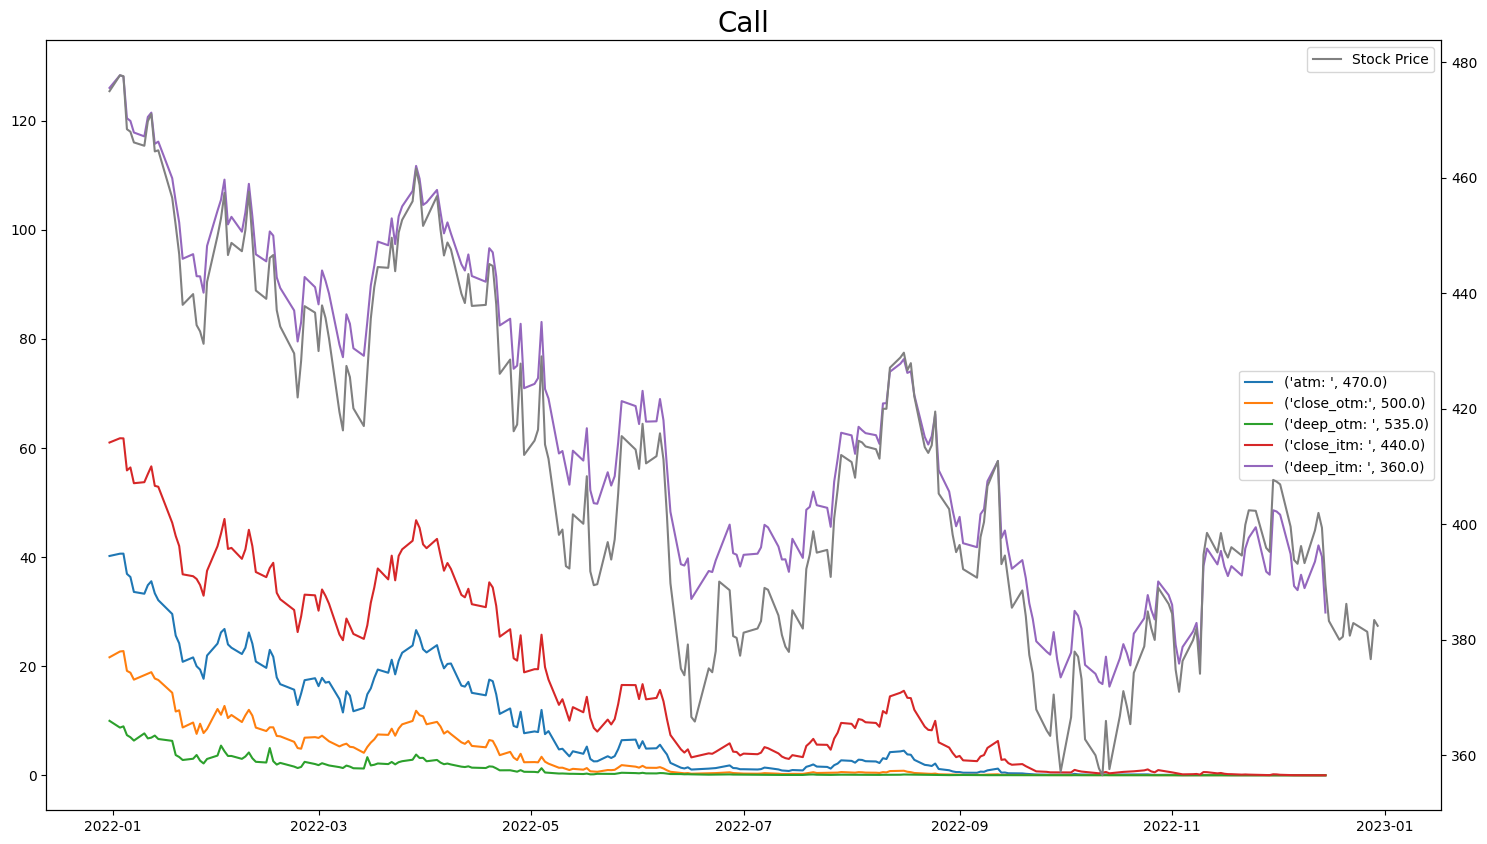

In [352]:
groups = [options_atm_groups,options_above_close_groups,options_above_far_groups,options_below_close_groups,options_below_far_groups]
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
for group in groups:
    for key, value in group:
        ax1.plot(value.QUOTE_TIME_EST,value.C_ASK)



# ax1.legend([list(i.groups.keys())[0] for i in groups],loc='center left')
ax1.legend(list(zip(['atm: ','close_otm:','deep_otm: ','close_itm: ','deep_itm: '],
                    [list(i.groups.keys())[0] for i in groups]))
           ,loc='center right')
plt.title('Call',size = 20)

ax2.plot(st_draw.DATE, st_draw.CLOSE, color = 'grey')
ax2.legend(['Stock Price'],loc='upper right')

fig.set_size_inches(18, 10, forward=True)

C:\Users\27270\AppData\Local\Temp\ipykernel_21692\1090503833.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, value in group:


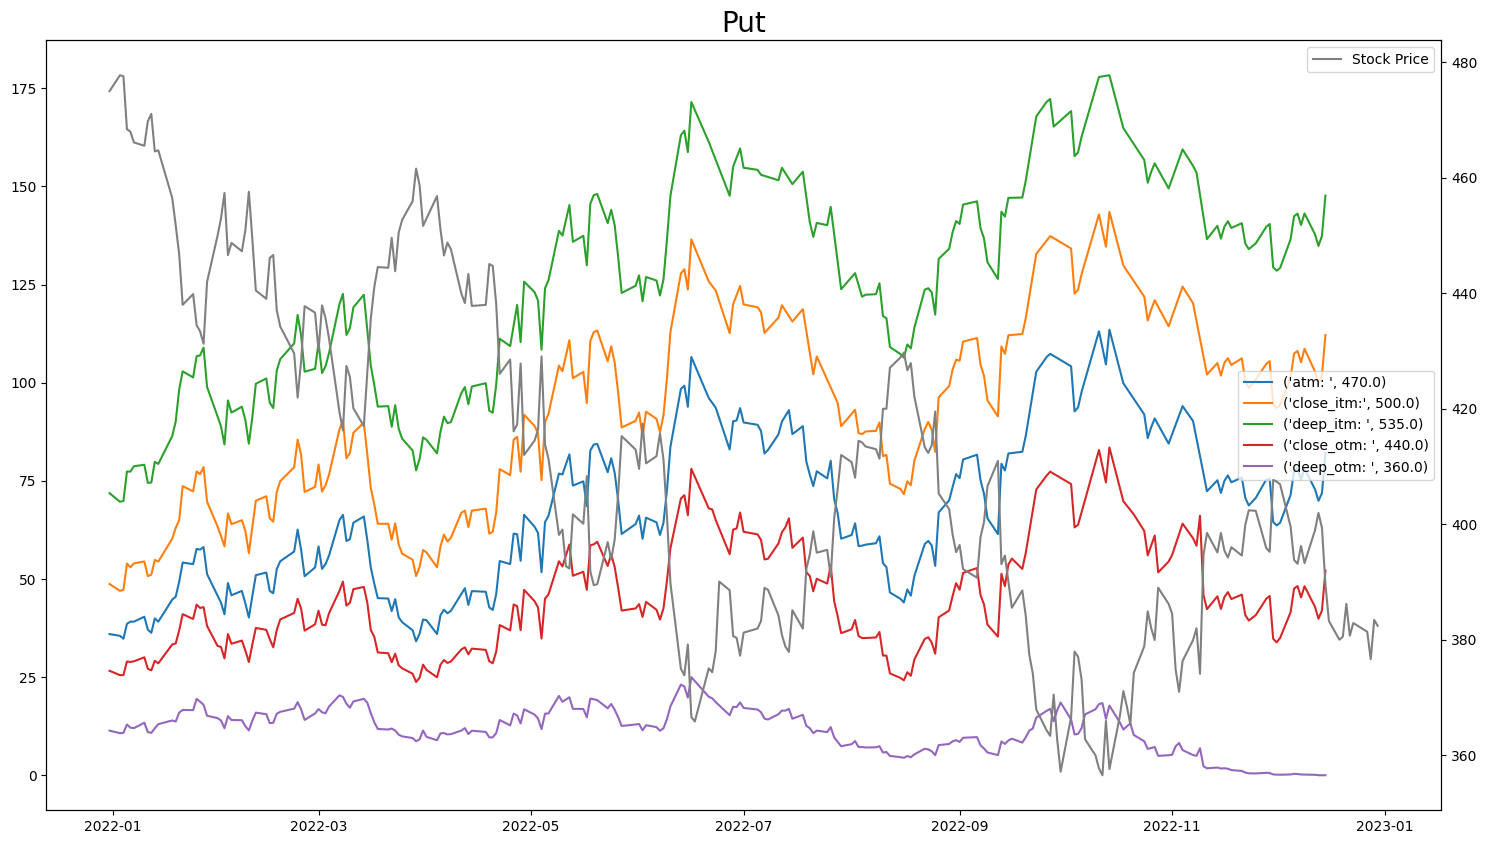

In [354]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
for group in groups:
    for key, value in group:
        ax1.plot(value.QUOTE_TIME_EST,value.P_ASK)

ax1.legend(list(zip(['atm: ','close_itm:','deep_itm: ','close_otm: ','deep_otm: '],
                    [list(i.groups.keys())[0] for i in groups]))
           ,loc='center right')

plt.title('Put',size = 20)

ax2.plot(st_draw.DATE, st_draw.CLOSE, color = 'grey')
ax2.legend(['Stock Price'],loc='upper right')

fig.set_size_inches(18, 10, forward=True)

In [311]:
keys = [i.groups.keys() for i in groups]

[470.0, 500.0, 535.0, 440.0, 360.0]